In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [4]:
df['smoker']=lb.fit_transform(df['smoker'])
df['sex']=lb.fit_transform(df['sex'])
df['time']=lb.fit_transform(df['time'])
df['day']=lb.fit_transform(df['day'])

In [5]:
df.dtypes

,0
total_bill,float64
tip,float64
sex,int64
smoker,int64
day,int64
time,int64
size,int64


In [6]:
df.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,-0.043550,-0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,-0.011548,-0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,-0.078292,-0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.282721,-0.054921,-0.133178
day,-0.043550,-0.011548,-0.078292,-0.282721,1.000000,0.638019,0.069510
time,-0.183118,-0.121629,-0.205231,-0.054921,0.638019,1.000000,-0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.069510,-0.103411,1.000000


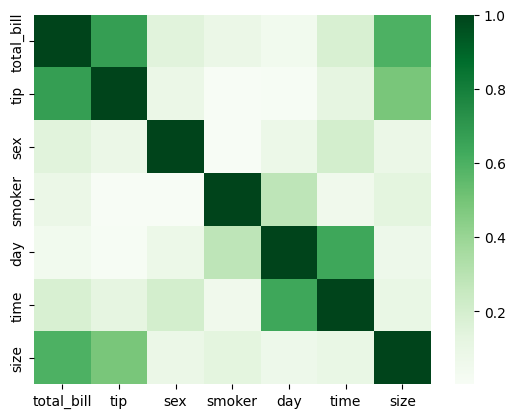

In [7]:
import matplotlib.pyplot as plt
sns.heatmap(np.abs(df.corr()), cmap='Greens')
plt.show()

In [8]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [9]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [10]:
scale_array=std_scaler.fit_transform(df)

In [11]:
scale_array.shape

(244, 7)

In [12]:
from sklearn.preprocessing import MinMaxScaler
mx_scaler=MinMaxScaler()

In [13]:
mx_array=mx_scaler.fit_transform(df)

In [14]:
type(mx_array)

numpy.ndarray

In [15]:
mx_array

array([[0.29157939, 0.00111111, 0.        , ..., 0.66666667, 0.        ,
        0.2       ],
       [0.1522832 , 0.07333333, 1.        , ..., 0.66666667, 0.        ,
        0.4       ],
       [0.3757855 , 0.27777778, 1.        , ..., 0.66666667, 0.        ,
        0.4       ],
       ...,
       [0.41055718, 0.11111111, 1.        , ..., 0.33333333, 0.        ,
        0.2       ],
       [0.30896523, 0.08333333, 1.        , ..., 0.33333333, 0.        ,
        0.2       ],
       [0.32907415, 0.22222222, 0.        , ..., 1.        , 0.        ,
        0.2       ]])

In [16]:
mx_df=pd.DataFrame(mx_array,columns=df.columns)
mx_df

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,0.001111,0.0,0.0,0.666667,0.0,0.2
1,0.152283,0.073333,1.0,0.0,0.666667,0.0,0.4
2,0.375786,0.277778,1.0,0.0,0.666667,0.0,0.4
3,0.431713,0.256667,1.0,0.0,0.666667,0.0,0.2
4,0.450775,0.290000,0.0,0.0,0.666667,0.0,0.6
...,...,...,...,...,...,...,...
239,0.543779,0.546667,1.0,0.0,0.333333,0.0,0.4
240,0.505027,0.111111,0.0,1.0,0.333333,0.0,0.2
241,0.410557,0.111111,1.0,1.0,0.333333,0.0,0.2
242,0.308965,0.083333,1.0,0.0,0.333333,0.0,0.2


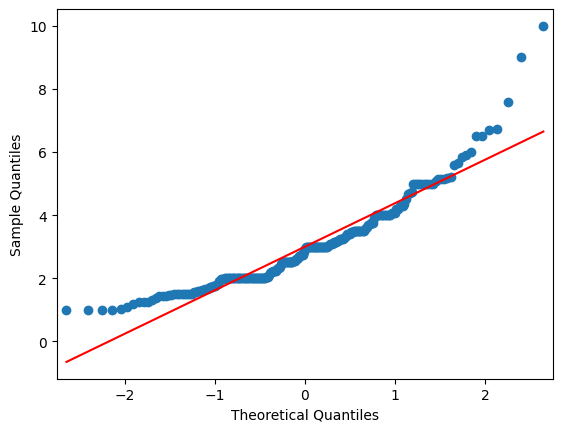

In [17]:
import statsmodels.api as sm
sm.qqplot(df['tip'],line='s')
plt.show()